# 1.&nbsp; Data reading and preprocessing

We will first review what we did in the previous notebook.

In [1]:
import pandas as pd

url = "https://drive.google.com/file/d/1tVTh77_j7aettNGZlk3gT1yZXsZLTZyp/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

## 1.1 Take Away Expensive Column

In [2]:
y = data.pop('Expensive')

In [3]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

## 1.2. Define X

In [4]:
X = data

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [6]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

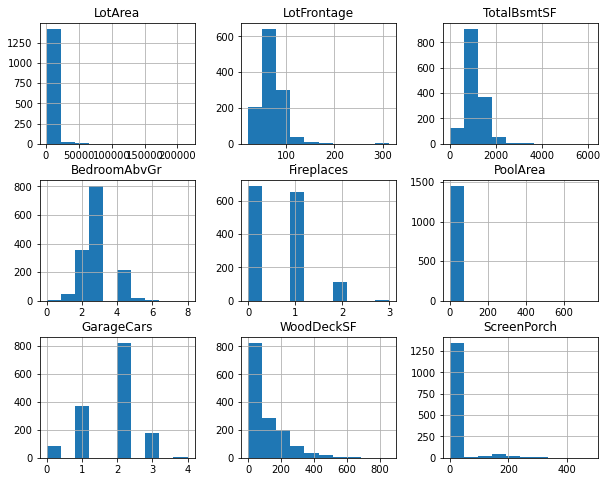

In [7]:
X.hist(figsize=(10, 8));

In [9]:
X_num = X.select_dtypes(include="number")

## 1.3. Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [11]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state=31416)

## 1.4 Impute missing values

Use the simple imputer that allows these strategies:

mean (default),
median,
most frequent,
constant.
For more details, look here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
# 1. initialize
my_imputer = SimpleImputer()

In [14]:
my_imputer.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'missing_values': nan,
 'strategy': 'mean',
 'verbose': 0}

In [15]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [16]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [17]:
X_num_imputed_train

array([[7.81900000e+03, 9.40000000e+01, 1.02900000e+03, ...,
        2.00000000e+00, 1.44000000e+02, 0.00000000e+00],
       [1.20030000e+04, 9.20000000e+01, 7.74000000e+02, ...,
        3.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.54000000e+03, 7.01035197e+01, 8.88000000e+02, ...,
        2.00000000e+00, 0.00000000e+00, 1.92000000e+02],
       ...,
       [1.53300000e+03, 2.10000000e+01, 6.30000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03800000e+04, 8.60000000e+01, 1.50200000e+03, ...,
        2.00000000e+00, 2.01000000e+02, 0.00000000e+00],
       [8.94400000e+03, 6.50000000e+01, 1.58400000e+03, ...,
        3.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [18]:
# 4. use transform on the test set
X_num_imputed_test = my_imputer.transform(X_num_test)

## 1.5. Modelling: Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
my_tree = DecisionTreeClassifier(max_depth=4,
                                 min_samples_leaf=10
                                )

In [21]:
my_tree.fit(X = X_num_imputed_train, 
            y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

## 1.6. Check accuracy on the train set

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

In [24]:
y_pred_tree_train

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
round(accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train), 2)

0.92

## 1.7. Check accuracy on the test set

In [26]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

In [27]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test)

0.928082191780822

# 2. PIPELINE CREATION

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [29]:
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10)

In [30]:
pipe = make_pipeline(imputer, dtree)

In [31]:
from sklearn.pipeline import Pipeline
pipe_2 = Pipeline([("imputer", imputer), ("classifier", dtree)])

In [32]:
pipe.fit(X_num_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10))])

## 2.4 Use the pipeline to make predictions

In [33]:
pipe.predict(X_num_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Now, the object `pipe` can take (almost) raw data as input and output predictions. We no longer need to impute missing values and use the model to make predictions in separate steps.

# 3.&nbsp; Use GridSearchCV to find the best parameters of the model

So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

It's not efficient in terms of quickly finding the best combination of parameters.
If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development —we have been cheating a bit!
Grid Search Cross Validation solves both issues:

Read the lesson "Housing Prices: Iteration 2, Grid Search & Cross Validation" on the platform.

Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [34]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()

In [35]:
# 2. Create a pipeline
pipe = make_pipeline(imputer, dtree)

In [36]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [37]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process

In [41]:
search.fit(X_num_imputed_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

In [42]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 38}

In [43]:
search.best_score_

0.9280950808847805

In [44]:
# training accuracy
y_train_pred = search.predict(X_num_train)

accuracy_score(y_train, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9332191780821918

In [77]:
# testing accuracy
y_test_pred = search.predict(X_num_test)

accuracy_score(y_test, y_test_pred)

0.9383561643835616

# 4.  Use GridSearchCV to find the best parameters of the pipeline

In [78]:
from sklearn.preprocessing import StandardScaler

In [59]:
# initialize transformers & model
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

In [60]:
# create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree)

In [49]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [50]:
# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [51]:
# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=1)

In [52]:
# fit
search.fit(X_num_train, y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [53]:
# cross validation average accuracy
search.best_score_

0.929804008252284

In [54]:
# best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'simpleimputer__strategy': 'median',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [57]:
y_test_pred = search.predict(X_num_test)

round(accuracy_score(y_test, y_test_pred),3)

0.928

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()
s_scaler = StandardScaler()

# 2. add parameters
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

# 3.  create the pipeline
pipe = make_pipeline(imputer,
                     s_scaler,
                     dtree)

#4. Fit the pipeline to the training data
#pipe.fit(X_train, y_train)


#4. define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=7,
                      verbose=1)

#5. 
search.fit(X_train, y_train)

Fitting 7 folds for each of 5120 candidates, totalling 35840 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [65]:
search.best_score_

0.9289476125202264

In [66]:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 9,
 'decisiontreeclassifier__min_samples_split': 28,
 'simpleimputer__strategy': 'mean',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [73]:
y_test_pred = search.predict(X_test)

In [72]:
search.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [80]:
accuracy_score(y_true = y_test, y_pred = y_test_pred)

0.9383561643835616

In [82]:
accuracy_score(y_true = y_train, y_pred = y_train_pred)

0.9332191780821918